# **Object Detection from Image: Learning Project**

# Image 1

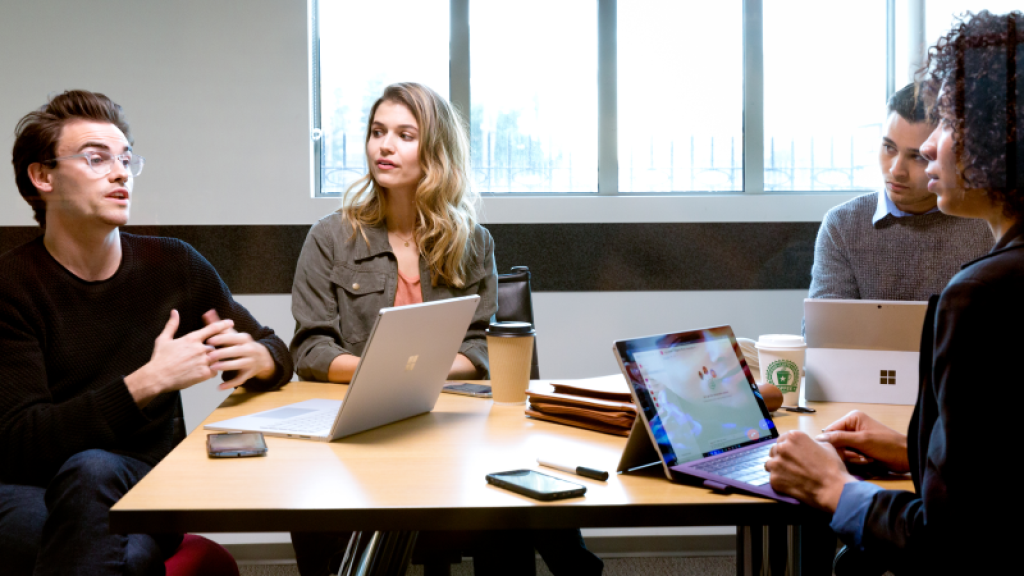

In [3]:
import cv2
import requests
import numpy as np
from google.colab.patches import cv2_imshow

# Download the image
image_url = "https://drive.google.com/uc?export=download&id=1m--BAJIGhlxryy3H0d283U6qWQEfar49"
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Display the image
cv2_imshow(img)



Downloading...
From: https://drive.google.com/uc?id=1zSGO4e9WwtaCXB_BHrVEZppKgLJsnr2a
To: /content/frozen_inference_graph.pb
100%|██████████| 13.4M/13.4M [00:00<00:00, 238MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_irzPLsTWHK97GAFj4Zp91ciDdB0XEP3
To: /content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
100%|██████████| 182k/182k [00:00<00:00, 47.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_1vazaCnu-u6RNBU34G3eWu1SuKl6Giy
To: /content/classify_names.txt
100%|██████████| 702/702 [00:00<00:00, 1.57MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m--BAJIGhlxryy3H0d283U6qWQEfar49
To: /content/employee.png
100%|██████████| 729k/729k [00:00<00:00, 115MB/s]


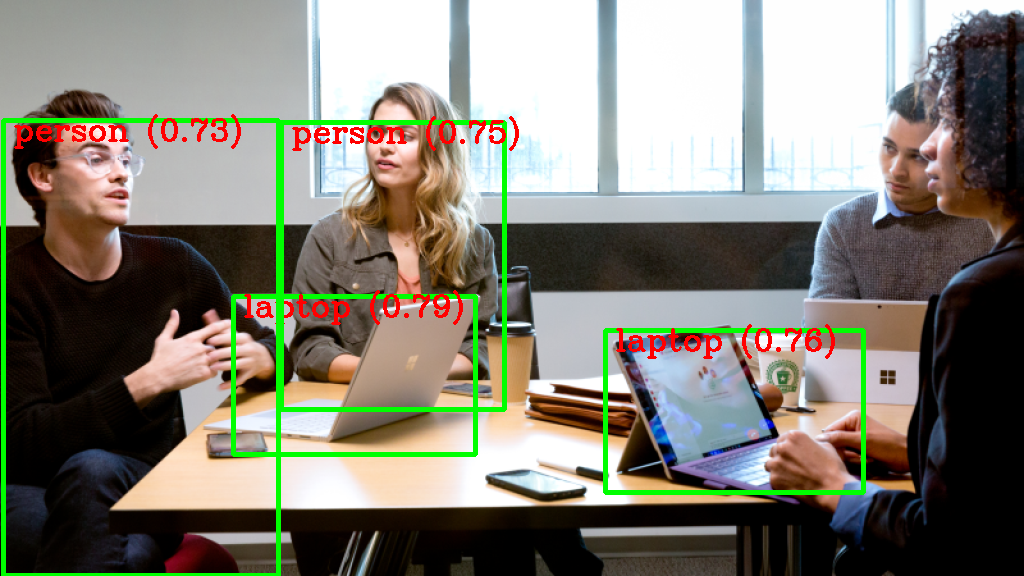

In [18]:
import cv2
import numpy as np
import gdown
from google.colab.patches import cv2_imshow  # Required for image display in Colab

# --- STEP 1: Download Required Files ---
pb_file_id = "1zSGO4e9WwtaCXB_BHrVEZppKgLJsnr2a"  # Model weights
pbtxt_file_id = "1_irzPLsTWHK97GAFj4Zp91ciDdB0XEP3"  # Model configuration
classfile_id = "1_1vazaCnu-u6RNBU34G3eWu1SuKl6Giy"  # Class names file
image_id = "1m--BAJIGhlxryy3H0d283U6qWQEfar49"  # Employee image

# Paths where files will be saved locally
pb_path = "/content/frozen_inference_graph.pb"
pbtxt_path = "/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
classfile_path = "/content/classify_names.txt"
image_path = "/content/employee.png"

# Download all necessary files
gdown.download(f"https://drive.google.com/uc?id={pb_file_id}", pb_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={pbtxt_file_id}", pbtxt_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={classfile_id}", classfile_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={image_id}", image_path, quiet=False)

# --- STEP 2: Load Class Names ---
classnames = []  # List to store object class names
with open(classfile_path, 'rt') as f:
    classnames = f.read().strip().split("\n")

# --- STEP 3: Load the Image ---
img = cv2.imread(image_path)

# Ensure the image is loaded correctly
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# --- STEP 4: Load and Configure Model ---
net = cv2.dnn_DetectionModel(pb_path, pbtxt_path)  # Load trained model

# Set input parameters for the model
net.setInputSize(320, 230)  # Set input image size (width, height)
net.setInputScale(1.0 / 127.5)  # Scale normalization
net.setInputMean((127.5, 127.5, 127.5))  # Mean normalization
net.setInputSwapRB(True)  # Swap Red and Blue channels for correct color representation

# Set preferable backend and target (use GPU if available)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# --- STEP 5: Perform Object Detection ---
classIds, confs, bbox = net.detect(img, confThreshold=0.7)  # Confidence threshold set to 70%

# --- STEP 6: Draw Bounding Boxes and Labels ---
for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=3)  # Draw bounding box
    label = f"{classnames[classId-1]} ({confidence:.2f})" if classId-1 < len(classnames) else f"Unknown ({confidence:.2f})"
    cv2.putText(img, label, (box[0] + 10, box[1] + 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), thickness=2)  # Add label

# --- STEP 7: Display Image (Colab Friendly) ---
cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow()


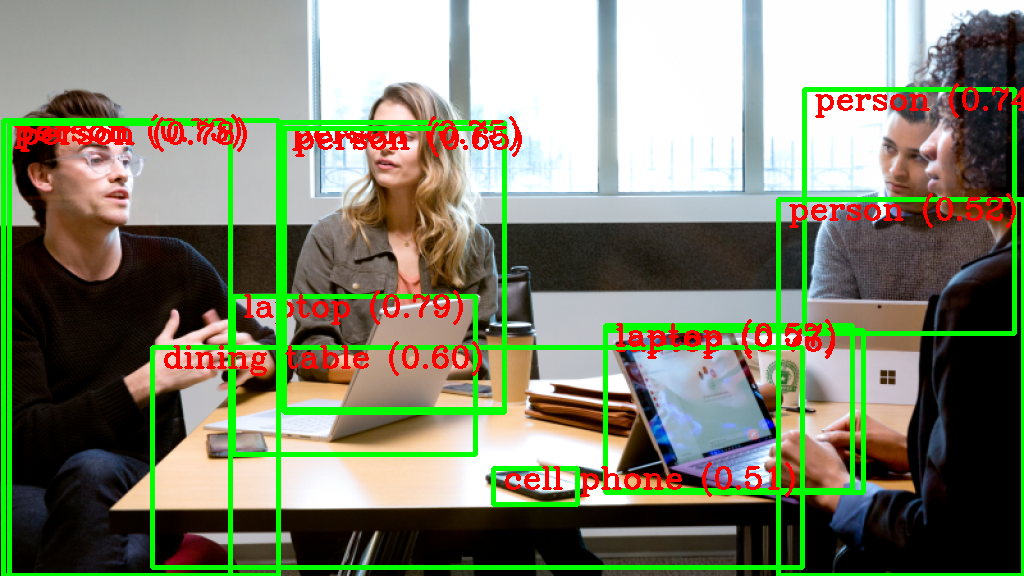

In [19]:
# Control confidence threshold from 70% to 50% bellow:
# --- STEP 5: Perform Object Detection ---
classIds, confs, bbox = net.detect(img, confThreshold=0.5)  # Confidence threshold set to 50%

# --- STEP 6: Draw Bounding Boxes and Labels ---
for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=3)  # Draw bounding box
    label = f"{classnames[classId-1]} ({confidence:.2f})" if classId-1 < len(classnames) else f"Unknown ({confidence:.2f})"
    cv2.putText(img, label, (box[0] + 10, box[1] + 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), thickness=2)  # Add label

# --- STEP 7: Display Image (Colab Friendly) ---
cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow()

# Image 2

Downloading...
From: https://drive.google.com/uc?id=1zSGO4e9WwtaCXB_BHrVEZppKgLJsnr2a
To: /content/frozen_inference_graph.pb
100%|██████████| 13.4M/13.4M [00:00<00:00, 227MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_irzPLsTWHK97GAFj4Zp91ciDdB0XEP3
To: /content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
100%|██████████| 182k/182k [00:00<00:00, 75.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_1vazaCnu-u6RNBU34G3eWu1SuKl6Giy
To: /content/classify_names.txt
100%|██████████| 702/702 [00:00<00:00, 2.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fE84Y-SYwrcWk59fgP1mJCgBwYCB_J2Y
To: /content/elephant.jpg
100%|██████████| 145k/145k [00:00<00:00, 70.9MB/s]


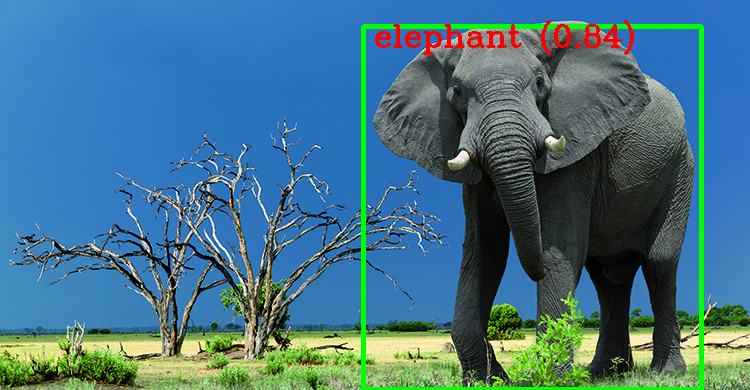

In [4]:
import cv2
import numpy as np
import gdown
from google.colab.patches import cv2_imshow  # Required for image display in Colab

# --- STEP 1: Download Required Files ---
pb_file_id = "1zSGO4e9WwtaCXB_BHrVEZppKgLJsnr2a"  # Model weights
pbtxt_file_id = "1_irzPLsTWHK97GAFj4Zp91ciDdB0XEP3"  # Model configuration
classfile_id = "1_1vazaCnu-u6RNBU34G3eWu1SuKl6Giy"  # Class names file
image_id = "1fE84Y-SYwrcWk59fgP1mJCgBwYCB_J2Y"  # Updated image (elephant.jpg)

# Paths where files will be saved locally
pb_path = "/content/frozen_inference_graph.pb"
pbtxt_path = "/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
classfile_path = "/content/classify_names.txt"
image_path = "/content/elephant.jpg"  # Updated image path

# Download all necessary files
gdown.download(f"https://drive.google.com/uc?id={pb_file_id}", pb_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={pbtxt_file_id}", pbtxt_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={classfile_id}", classfile_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={image_id}", image_path, quiet=False)

# --- STEP 2: Load Class Names ---
classnames = []  # List to store object class names
with open(classfile_path, 'rt') as f:
    classnames = f.read().strip().split("\n")

# --- STEP 3: Load the Image ---
img = cv2.imread(image_path)

# Ensure the image is loaded correctly
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# --- STEP 4: Load and Configure Model ---
net = cv2.dnn_DetectionModel(pb_path, pbtxt_path)  # Load trained model

# Set input parameters for the model
net.setInputSize(320, 230)  # Set input image size (width, height)
net.setInputScale(1.0 / 127.5)  # Scale normalization
net.setInputMean((127.5, 127.5, 127.5))  # Mean normalization
net.setInputSwapRB(True)  # Swap Red and Blue channels for correct color representation

# Set preferable backend and target (use GPU if available)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# --- STEP 5: Perform Object Detection ---
classIds, confs, bbox = net.detect(img, confThreshold=0.5)  # Confidence threshold set to 50%

# --- STEP 6: Sort and Filter Detections ---
detections = sorted(zip(classIds.flatten(), confs.flatten(), bbox), key=lambda x: x[1], reverse=True)
detections = detections[:5]  # Keep top 5 most confident detections

for classId, confidence, box in detections:
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=3)  # Draw bounding box
    label = f"{classnames[classId-1]} ({confidence:.2f})" if classId-1 < len(classnames) else f"Unknown ({confidence:.2f})"
    cv2.putText(img, label, (box[0] + 10, box[1] + 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), thickness=2)  # Add label

# --- STEP 7: Display Image (Colab Friendly) ---
cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow()


# Image 3

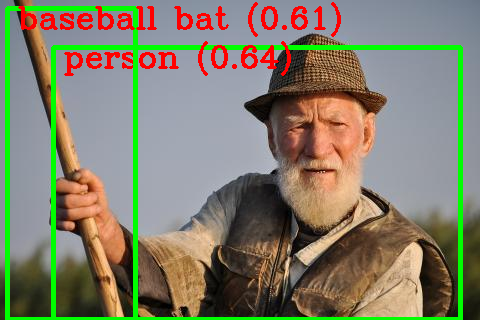

In [7]:
# Perform Object Detection
results = net.detect(img, confThreshold=0.5)  # Returns a tuple (classIds, confs, bbox)

# Ensure proper unpacking
if len(results) == 3:
    classIds, confs, bbox = results
else:
    raise ValueError("Unexpected output format from detect(). Check OpenCV version.")

# Convert values into NumPy arrays to avoid tuple-related errors
classIds = np.array(classIds)
confs = np.array(confs)
bbox = np.array(bbox)

# Sort detections by confidence and keep top results
detections = sorted(zip(classIds.flatten(), confs.flatten(), bbox), key=lambda x: x[1], reverse=True)

# Limit to top 5 most confident detections
detections = detections[:5]

for classId, confidence, box in detections:
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=3)  # Draw bounding box
    label = f"{classnames[classId-1]} ({confidence:.2f})" if classId-1 < len(classnames) else f"Unknown ({confidence:.2f})"
    cv2.putText(img, label, (box[0] + 10, box[1] + 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), thickness=2)  # Add label

cv2_imshow(img)


# **Object Detection from Image: Learning Project**

## **Project Description**
This project is my **first Computer Vision (CV) project**, created as a hands-on exploration of OpenCV's capabilities. It serves as an introduction to deep learning-based object detection, helping me **delve into the world of CV** while learning how to preprocess images, apply detection models, and visualize results.

The project automates object recognition by using a **pre-trained SSD MobileNet V3 model**, detecting multiple objects in a static image and labeling them with bounding boxes.

## **Algorithms Used**
### **Single Shot MultiBox Detector (SSD)**
SSD is a **deep learning object detection algorithm** designed for speed and efficiency. Unlike region-based methods, SSD predicts bounding boxes **in a single forward pass**, making it suitable for real-time applications.

### **MobileNet V3**
MobileNet V3 is a **lightweight CNN-based model**, optimized for mobile and edge devices. It balances **speed and accuracy**, making it effective for real-time object detection without requiring heavy computational resources.

## **Key Learnings**
- **Using pre-trained models** for object detection in OpenCV (`cv2.dnn`).
- **Configuring deep learning models** for optimized performance.
- **Bounding box filtering techniques** for better visualization.
- **Handling real-world detection challenges** in a structured way.

## **Project Files**
All related files for this project are available here:  
🔗 [Project Files](https://drive.google.com/drive/folders/1v_Ylqixc_b7MVh1_YQrx-JUl_vSKMr2R?usp=sharing)

## **Reference**
This project was built while learning from the following course:  
🎥 [Python OpenCV AI Course](https://www.youtube.com/watch?v=R209hItdu0k&t=4292s)  
📺 **Channel:** راكوان للبرمجة - CodeRK  
